Displaying the first 5 rows of the dataset:

The dataset is having 1259 rows and 27 columns.

Displaying the list of all columns:
['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Checking for missing values in each column:
comments          1095
state              515
work_interfere     264
self_employed       18
dtype: int64

Visualizing missing values:


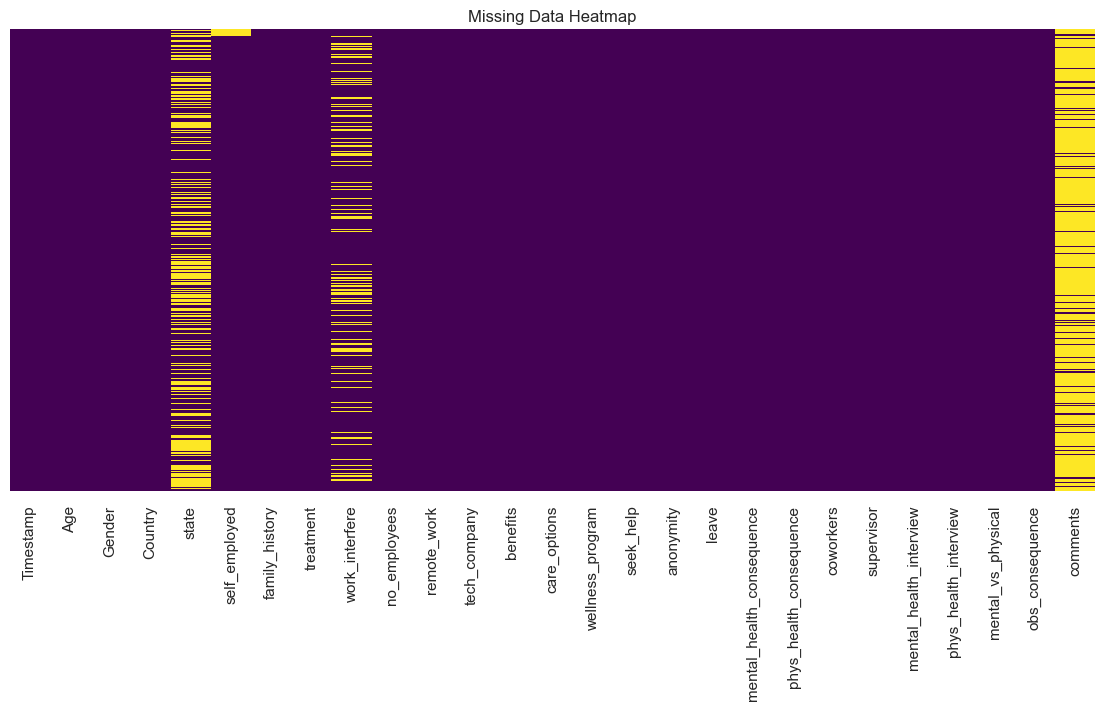


Generating descriptive statistics for numerical features:

Displaying unique values for key categorical columns:

Gender:
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-

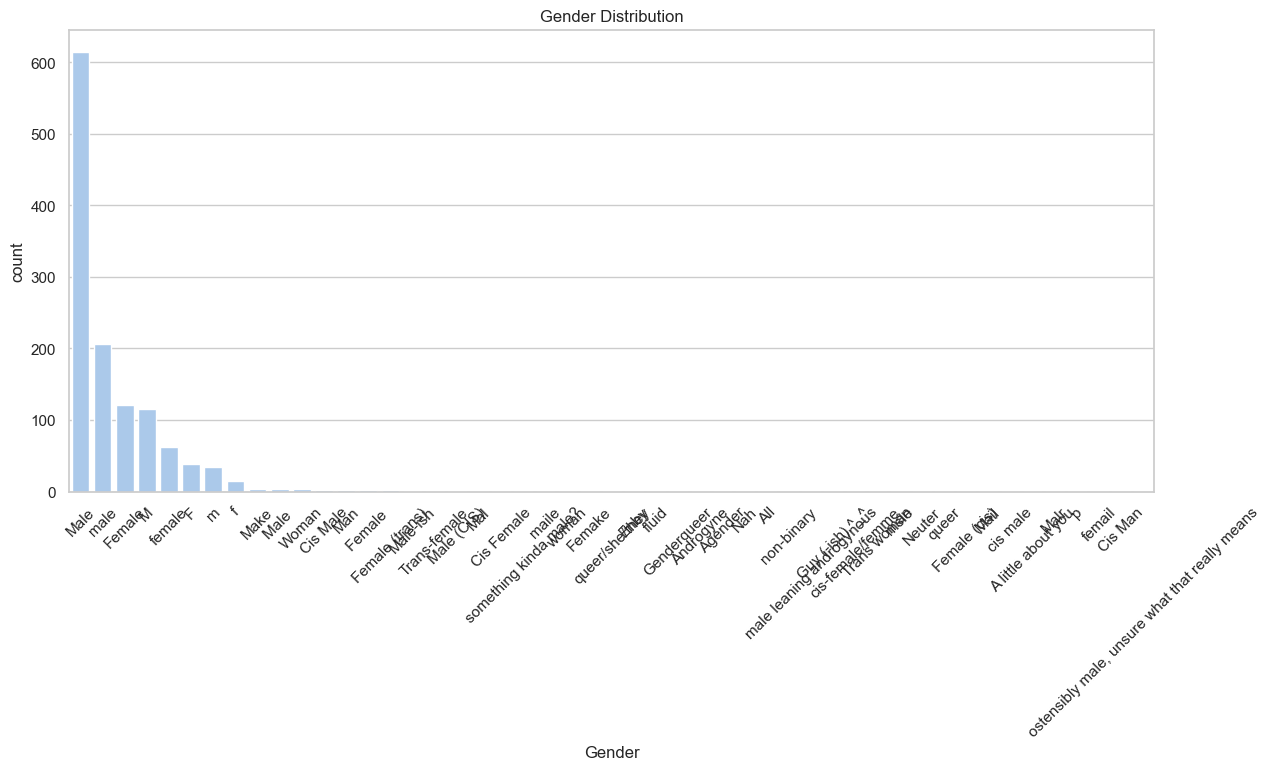


Plotting mental health treatment distribution:


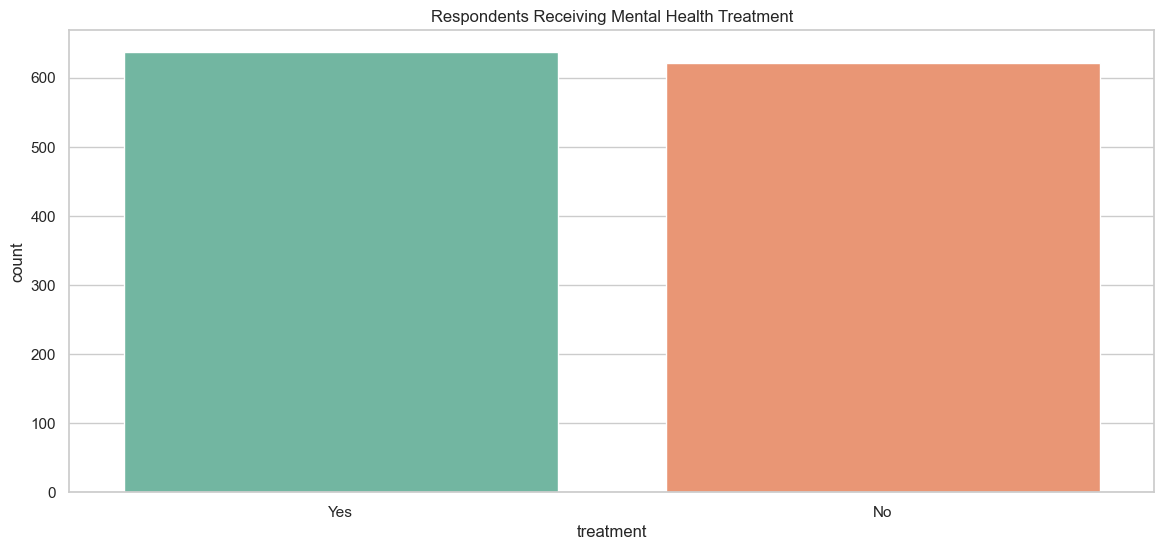


Plotting care options by company size:


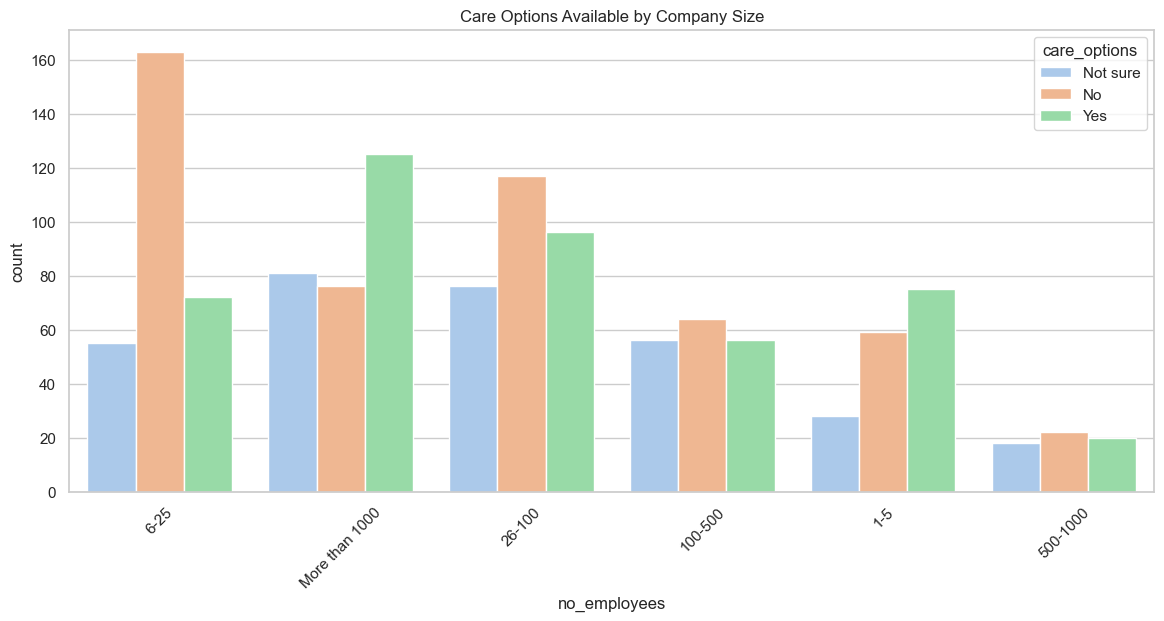


Plotting work interference with mental health grouped by treatment:


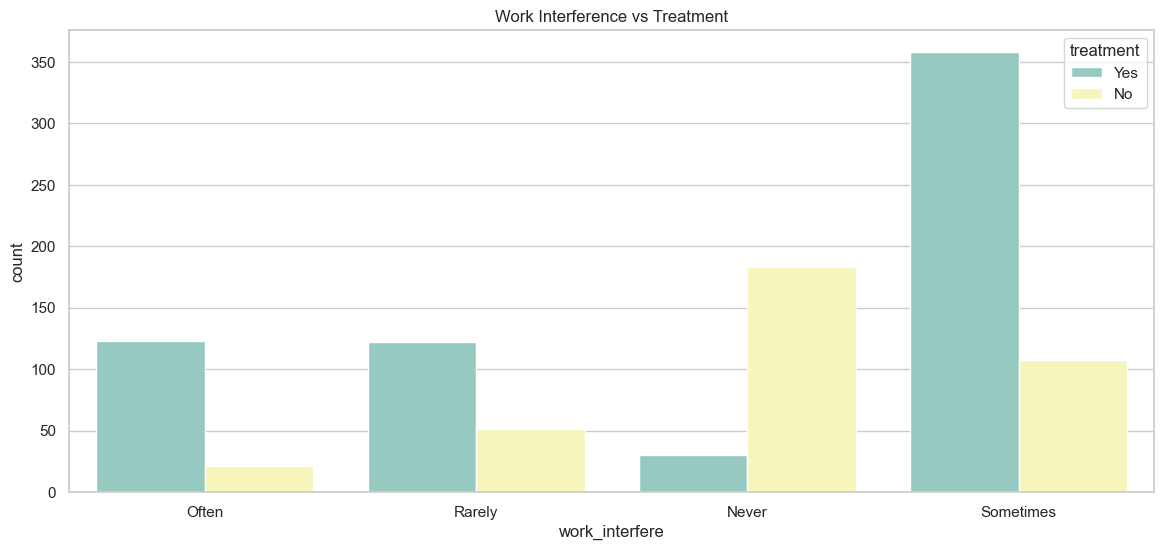


Comparing mental health benefits in tech vs non-tech companies:


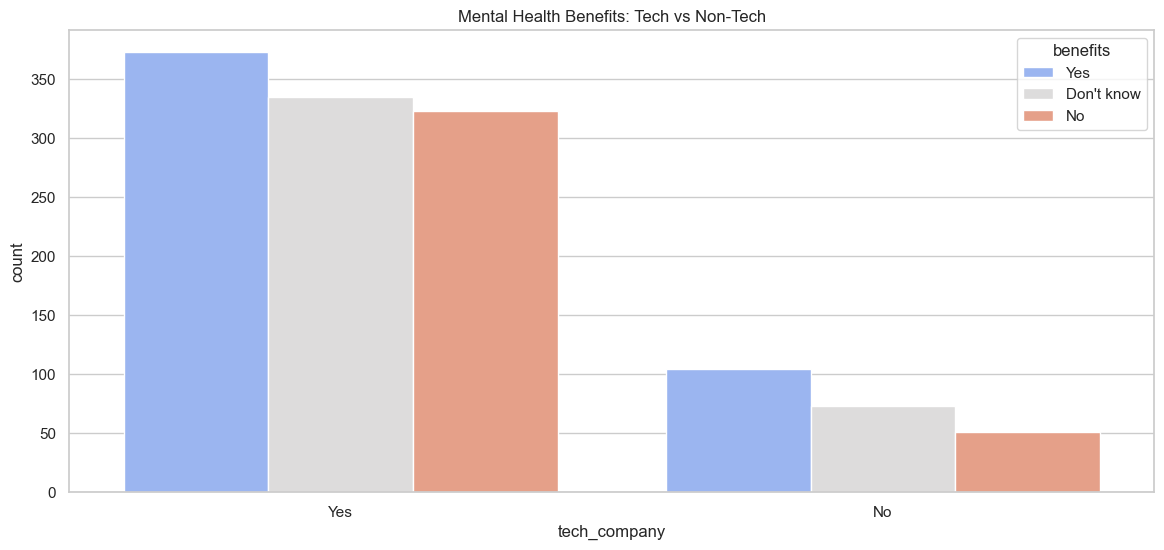

In [4]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Setting visualization style.
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (14, 6)

# Loading the dataset.
data_path = "../data/raw/survey.csv"
df = pd.read_csv(data_path)

# Displaying the first 5 rows of the dataset.
print("Displaying the first 5 rows of the dataset:")
df.head(5)

# Checking the shape of the dataset.
print(f"\nThe dataset is having {df.shape[0]} rows and {df.shape[1]} columns.")

# Displaying column names
print("\nDisplaying the list of all columns:")
print(df.columns.tolist())

# Checking for missing values.
print("\nChecking for missing values in each column:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Visualizing missing values with a heatmap.
print("\nVisualizing missing values:")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Describing numerical columns.
print("\nGenerating descriptive statistics for numerical features:")
df.describe()

# Exploring categorical variables.
print("\nDisplaying unique values for key categorical columns:")
categorical_columns = ["Gender", "Country", "self_employed", "family_history",
                       "treatment", "work_interfere", "no_employees",
                       "remote_work", "tech_company", "benefits",
                       "care_options", "wellness_program", "seek_help"]

for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

# Visualizing gender distribution.
print("\nPlotting gender distribution:")
sns.countplot(data=df, x="Gender", order=df["Gender"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Gender Distribution")
plt.show()

# Visualizing treatment vs non-treatment.
print("\nPlotting mental health treatment distribution:")
sns.countplot(data=df, x="treatment", palette="Set2")
plt.title("Respondents Receiving Mental Health Treatment")
plt.show()

# Visualizing mental health support availability vs company size.
print("\nPlotting care options by company size:")
sns.countplot(data=df, x="no_employees", hue="care_options")
plt.title("Care Options Available by Company Size")
plt.xticks(rotation=45)
plt.show()

# Plotting work interference with mental health by treatment.
print("\nPlotting work interference with mental health grouped by treatment:")
sns.countplot(data=df, x="work_interfere", hue="treatment", palette="Set3")
plt.title("Work Interference vs Treatment")
plt.show()

# Exploring mental health benefits by tech vs non-tech companies.
print("\nComparing mental health benefits in tech vs non-tech companies:")
sns.countplot(data=df, x="tech_company", hue="benefits", palette="coolwarm")
plt.title("Mental Health Benefits: Tech vs Non-Tech")
plt.show()
